In [38]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

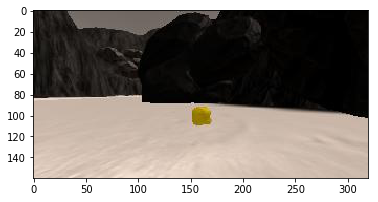

uint8 (160, 320, 3) 0 248


In [39]:
filename = 'calibration_images/example_rock1.jpg'
# filename = 'sample.jpg'
image = mpimg.imread(filename)
plt.imshow(image)
plt.show()
print(image.dtype, image.shape, np.min(image), np.max(image))

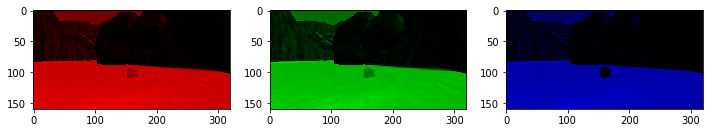

In [40]:
# red channel set g & b to 0
red_channel = np.copy(image)
red_channel[:,:,[1,2]] = 0
# green channel set r & b to 0
green_channel = np.copy(image)
green_channel[:,:,[0,2]] = 0
# blue channel set r & g to 0
blue_channel = np.copy(image)
blue_channel[:,:,[0,1]] = 0

fig = plt.figure(figsize=(12,3)) # Create a figure for plotting
plt.subplot(131) # Initialize subplot number 1 in a figure that is 3 columns 1 row
plt.imshow(red_channel) # Plot the red channel
plt.subplot(132) # Initialize subplot number 2 in a figure that is 3 columns 1 row
plt.imshow(green_channel)  # Plot the green channel
plt.subplot(133) # Initialize subplot number 3 in a figure that is 3 columns 1 row
plt.imshow(blue_channel)  # Plot the blue channel
plt.show()

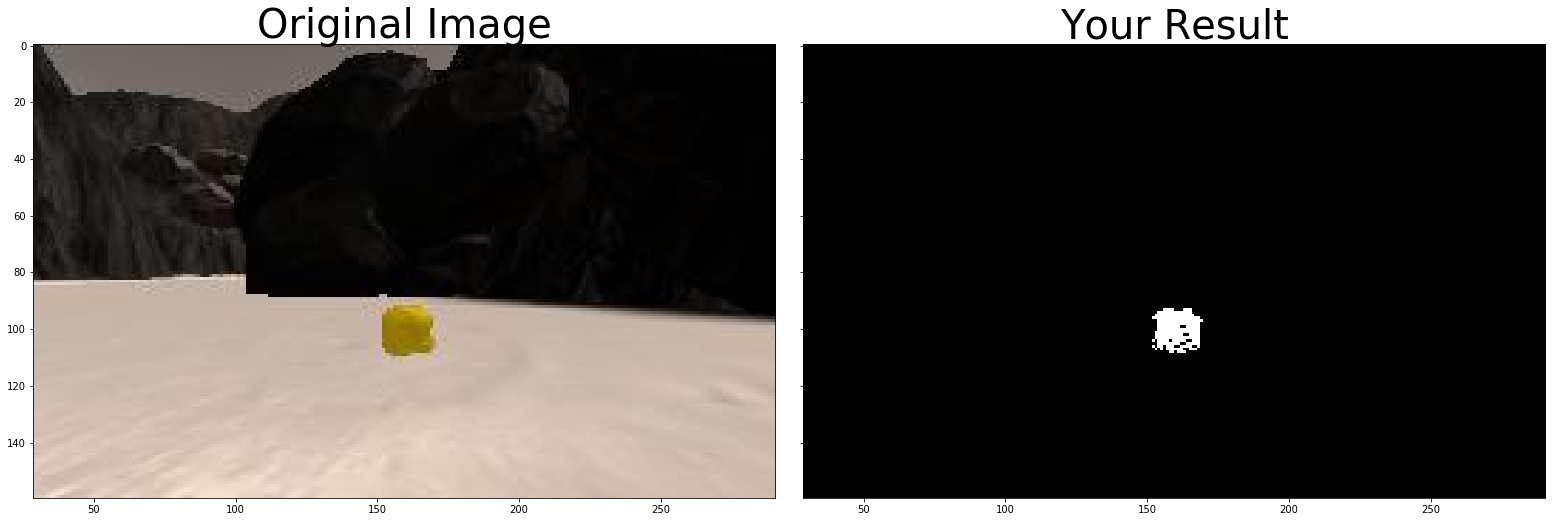

In [46]:
# Define a function to perform a color threshold
def color_thresh(img, rgb_thresh=(0, 0, 0)):
    ###### TODO:
    # Create an empty array the same size in x and y as the image 
    # but just a single channel
    color_select = np.zeros_like(img[:,:,0])
    # Apply the thresholds for RGB and assign 1's 
    # where threshold was exceeded
    # Return the single-channel binary image
#     color_select[img[:,:,0] > rgb_thresh[0]] = 1
    color_threshold_op = (img[:,:,0] > rgb_thresh[0]) & (img[:,:,1] > rgb_thresh[1]) & (img[:,:,2] > rgb_thresh[2])
    color_select[color_threshold_op] = 1
    return color_select

def color_thresh_minmax(img, rgb_thresh=((0, 0), (0, 0), (0, 0))):
    ###### TODO:
    # Create an empty array the same size in x and y as the image 
    # but just a single channel
    color_select = np.zeros_like(img[:,:,0])
    # Apply the thresholds for RGB and assign 1's 
    # where threshold was exceeded
    # Return the single-channel binary image
    color_threshold_op = (rgb_thresh[0][0] <= img[:,:,0]) & (img[:,:,0] <= rgb_thresh[0][1]) \
                & (rgb_thresh[1][0] <= img[:,:,1]) & (img[:,:,1] <= rgb_thresh[1][1]) \
                & (rgb_thresh[2][0] <= img[:,:,2]) & (img[:,:,2] <= rgb_thresh[2][1]) \

    
#     color_threshold_op = (rgb_thresh[0][0] <= img[:,:,0]) & (img[:,:,0] <= rgb_thresh[0][1]) \
#                         (rgb_thresh[1][0] <= img[:,:,1]) & (img[:,:,1] <= rgb_thresh[1][1]) \
#                         (rgb_thresh[2][0] <= img[:,:,2]) & (img[:,:,2] <= rgb_thresh[2][1])
    color_select[color_threshold_op] = 1
    return color_select



# Define color selection criteria
###### TODO: MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = (140, 255)
green_threshold = (140, 255)
blue_threshold = (0, 255)
######
rgb_threshold = (red_threshold, green_threshold, blue_threshold)

# pixels below the thresholds
colorsel = color_thresh_minmax(image, rgb_thresh=((140, 255),(110, 255),(0, 50)))

# Display the original image and binary               
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(21, 7), sharey=True)
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(colorsel, cmap='gray')
ax2.set_title('Your Result', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()